### Feature Analysis

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
df = pd.read_csv('C:/Users/USER/Documents/Machine Learning/Uber Fare Analysis and Prediction/data/uber_cleaned_final.csv')
df.head()

,fare_amount,passenger_count,year,month,day,hour,minute,day_of_week,is_night,is_day,distance,fare_per_km,fare_per_passenger,day_Friday,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday
0,2.140066,1,2015,5,7,19,52,Thursday,0,1,0.987057,1.696133,2.139184,0,0,0,0,1,0,0
1,2.163323,1,2009,7,17,20,4,Friday,1,0,1.240573,1.418731,2.162438,1,0,0,0,0,0,0
2,2.631889,1,2009,8,24,21,45,Monday,1,0,1.797805,1.270000,2.630961,0,1,0,0,0,0,0
3,1.840550,3,2009,6,26,8,22,Friday,0,1,0.978960,1.432131,1.017430,1,0,0,0,0,0,0
4,2.833213,5,2014,8,28,17,47,Thursday,0,1,1.700276,1.520444,1.434932,0,0,0,0,1,0,0


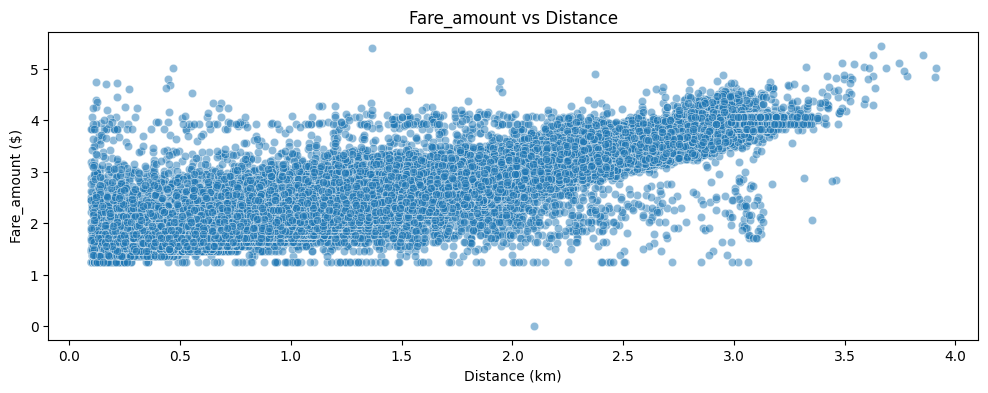

In [12]:
# Checking for the relationship between fare_amount and distance
plt.figure(figsize=(12, 4))
sns.scatterplot(x='distance', y='fare_amount', data=df, alpha=0.5)
plt.title('Fare_amount vs Distance')
plt.xlabel('Distance (km)')
plt.ylabel('Fare_amount ($)')
plt.show()

#### Insights
- Positive Correlation
There’s a clear upward trend - as distance increases, fare also increases, which aligns with expectations for a distance-based fare system.
- You can see a dense cluster between 0–2 miles. This tells us that most Uber rides in this dataset are short-distance urban trips.
- Higher fare variance in shorter trips could indicate surge pricing, wait time, or tolls.

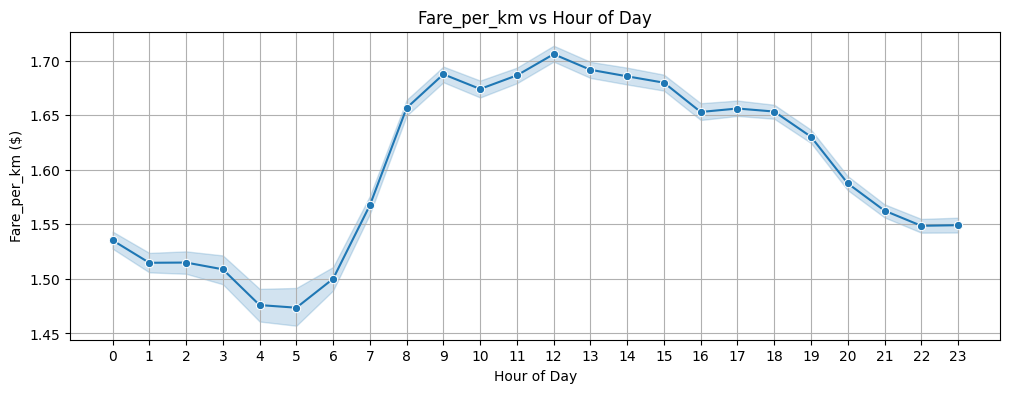

In [14]:
# Checking for the relationship between fare_per_km and and hour of the day
plt.figure(figsize=(12, 4))
sns.lineplot(x='hour', y='fare_per_km', data=df, marker='o')
plt.title('Fare_per_km vs Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Fare_per_km ($)')
plt.xticks(range(0, 24))
plt.grid()
plt.show()


#### Insights
- Lowest fare_per_km rates occur between 4 AM and 6 AM, possibly due to low demand and less traffic.
- Fare per km steadily rises from 7 AM, peaking around 12 PM (noon).
- The highest rates (~1.71 $/km) are observed between 11 AM and 1 PM, likely due to increased midday demand or traffic congestion.
- After 1 PM, rates gradually decline, stabilizing again after 8 PM.
- These patterns suggest dynamic pricing or congestion impacts on fare/km during different times of day.
- Could also hint at driver availability, route density, or algorithmic pricing adjustments.

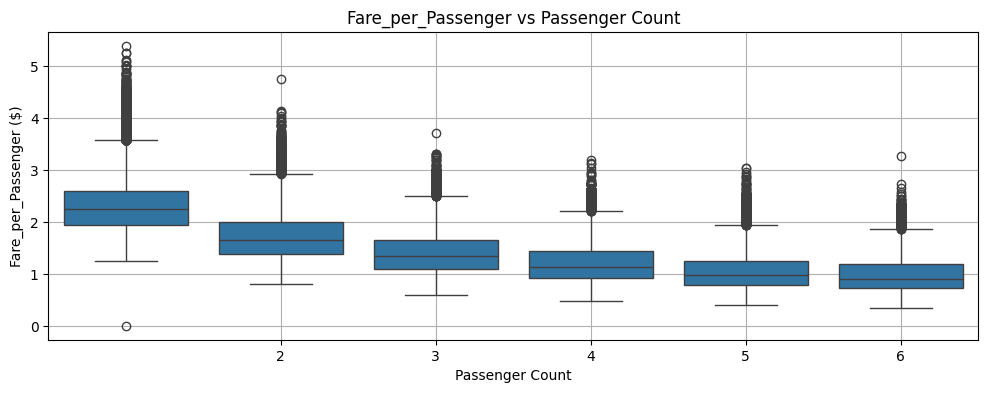

In [17]:
# Relationship between fare_per_passenger vs passenger_count
plt.figure(figsize=(12, 4))
sns.boxplot(x='passenger_count', y='fare_per_passenger', data=df)
plt.title('Fare_per_Passenger vs Passenger Count')
plt.xlabel('Passenger Count')
plt.ylabel('Fare_per_Passenger ($)')
plt.xticks(range(1, 6))
plt.grid()
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_10216\1670483253.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='day_of_week', y='fare_per_km', data=df, ci=None)


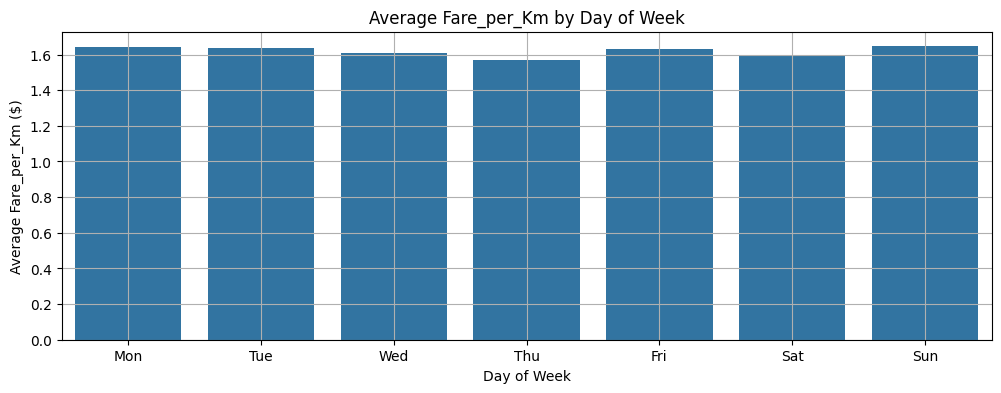

In [18]:
# Average fare_per_km by day of the week
plt.figure(figsize=(12, 4))
sns.barplot(x='day_of_week', y='fare_per_km', data=df, ci=None)
plt.title('Average Fare_per_Km by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Average Fare_per_Km ($)')
plt.xticks(range(7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.grid()
plt.show()

#### Observations
- The fare hovers slightly above $1.60/km every day.
- No significant spikes on weekends (which might suggest surge pricing).
- Weekdays don’t show any dips - demand or strategy is evenly balanced.

#### Insights
- Either fares are fixed and unaffected by rider volume or time-based surges.
- Or demand is well-distributed throughout the week, allowing prices to remain stable.

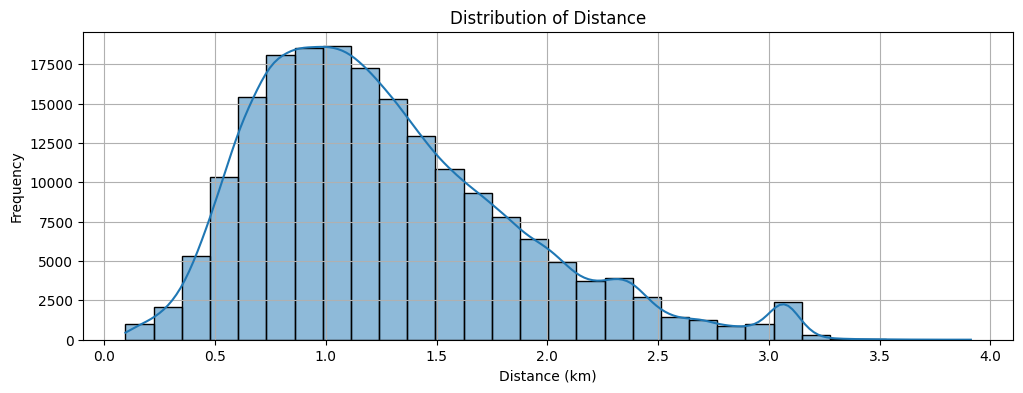

In [19]:
# Distribution of distance
plt.figure(figsize=(12, 4))
sns.histplot(df['distance'], bins=30, kde=True)
plt.title('Distribution of Distance')
plt.xlabel('Distance (km)')
plt.ylabel('Frequency')
plt.grid()
plt.show()